In [1]:
from numpy import *
import matplotlib.pyplot as plt
def loadDataSet():
    dataMat = []
    labelMat = []
    fr = open('Logistic/testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat
def sigmoid(inX):
    return 1.0/(1+exp(-inX))

In [2]:
def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)  
    labelMat = mat(classLabels).transpose()
    m,n = shape(dataMatrix)
    alpha = 0.001 
    maxCycles = 500 
    weights = ones((n,1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights

In [3]:
dataArr, labelMat = loadDataSet()
gradAscent(dataArr,labelMat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

In [4]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat, labelMat = loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s = 30, c = 'red', marker = 's')
    ax.scatter(xcord2, ycord2, s = 30, c = 'green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

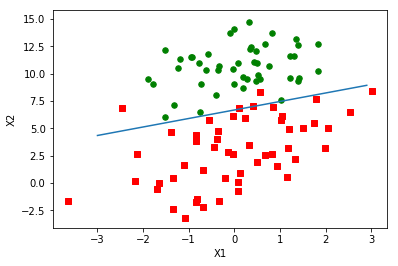

In [5]:
weights = gradAscent(dataArr,labelMat)
plotBestFit(weights.getA())

In [6]:
def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i]- h
        weights = weights + alpha*error*dataMatrix[i]
        return weights

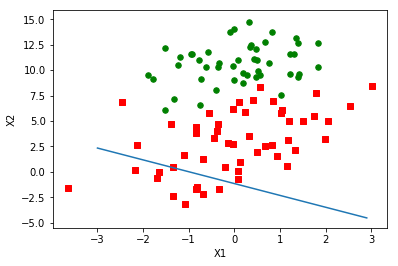

In [7]:
dataArr, labelMat = loadDataSet()
weights = stocGradAscent0(array(dataArr),labelMat)
plotBestFit(weights)

In [8]:
from numpy import *
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01
            randIndex = int(random.uniform(0,len(dataIndex)))
            h = sigmoid(sum(dataMatrix[dataIndex]*weights))
            error = classLabels[randIndex]- h
            weights = weights + alpha*error*dataMatrix[randIndex]
    return weights

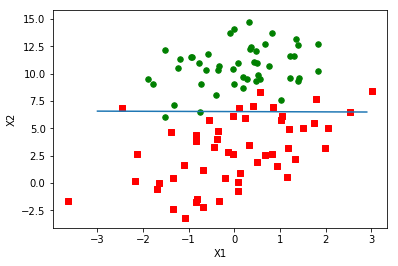

In [9]:
dataArr,labelMat = loadDataSet()
weights = stocGradAscent1(array(dataArr),labelMat)
plotBestFit(weights)

In [10]:
for o in range(10):
    print(o)

0
1
2
3
4
5
6
7
8
9


In [11]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob >0.5 :return 1.0
    else : return 0.0
def colicTest():
    frTrain = open('Logistic/horseColicTraining.txt')
    frTest = open('Logistic/horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(len(currLine)-1):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[len(currLine) - 1]))
    trainWeights = stocGradAscent1(array(trainingSet), trainingLabels, 500)
    errorCount = 0; numTestVec = 1
    for line in frTest.readlines():
        numTestVec += 1
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(len(currLine)-1):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights)) != int(currLine[len(currLine)-1]):
            errorCount += 1
    errorRate = float(errorCount) / float(numTestVec)
    print("the error rate of this test is: %f" % errorRate)
    return errorRate
def multiTest():
    numTests = 10
    errorsum= 0.0
    for k in range(numTests):
        errorsum += colicTest()
    print('after %d iterations the average error rate is: %f' %(numTests, errorsum/float(numTests)))

In [12]:
multiTest()

the error rate of this test is: 0.426471
the error rate of this test is: 0.426471
the error rate of this test is: 0.426471
the error rate of this test is: 0.411765
the error rate of this test is: 0.426471
the error rate of this test is: 0.426471
the error rate of this test is: 0.426471
the error rate of this test is: 0.426471
the error rate of this test is: 0.426471
the error rate of this test is: 0.411765
after 10 iterations the average error rate is: 0.423529
